In [13]:
import pandas as pd  
import numpy as np 
df_train = pd.read_csv("C:/Users/mraga/OneDrive/Desktop/Encryptix Internship/Task 1/train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
x_test = pd.read_csv("C:/Users/mraga/OneDrive/Desktop/Encryptix Internship/Task 1/test_data.txt",sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'])
df_test_sol= pd.read_csv("C:/Users/mraga/OneDrive/Desktop/Encryptix Internship/Task 1/test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
df_train, x_test, df_test_sol

C:\Users\mraga\AppData\Local\Temp\ipykernel_6672\2933643240.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train = pd.read_csv("C:/Users/mraga/OneDrive/Desktop/Encryptix Internship/Task 1/train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
C:\Users\mraga\AppData\Local\Temp\ipykernel_6672\2933643240.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  x_test = pd.read_csv("C:/Users/mraga/OneDrive/Desktop/Encryptix Internship/Task 1/test_data.txt",sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'])
C:\Users\mraga\AppData\Local\Temp\ipykernel_6672\2933643240.py:5: ParserWarning: 

(          ID                                         TITLE          GENRE  \
 0          1                 Oscar et la dame rose (2009)          drama    
 1          2                                 Cupid (1997)       thriller    
 2          3             Young, Wild and Wonderful (1980)          adult    
 3          4                        The Secret Sin (1915)          drama    
 4          5                       The Unrecovered (2007)          drama    
 ...      ...                                           ...            ...   
 54209  54210                              "Bonino" (1953)         comedy    
 54210  54211                  Dead Girls Don't Cry (????)         horror    
 54211  54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
 54212  54213                     Make Your Own Bed (1944)         comedy    
 54213  54214   Nature's Fury: Storm of the Century (2006)        history    
 
                                              DESCRIPTION  
 0

In [14]:
df_train.head(), x_test.head(), df_test_sol

(   ID                               TITLE       GENRE  \
 0   1       Oscar et la dame rose (2009)       drama    
 1   2                       Cupid (1997)    thriller    
 2   3   Young, Wild and Wonderful (1980)       adult    
 3   4              The Secret Sin (1915)       drama    
 4   5             The Unrecovered (2007)       drama    
 
                                          DESCRIPTION  
 0   Listening in to a conversation between his do...  
 1   A brother and sister with a past incestuous r...  
 2   As the bus empties the students for their fie...  
 3   To help their unemployed father make ends mee...  
 4   The film's title refers not only to the un-re...  ,
    ID                          TITLE  \
 0   1          Edgar's Lunch (1998)    
 1   2      La guerra de papá (1977)    
 2   3   Off the Beaten Track (2010)    
 3   4        Meu Amigo Hindu (2015)    
 4   5             Er nu zhai (1955)    
 
                                          DESCRIPTION  
 0   L.R.

In [15]:
df_train.shape, df_train.info(), df_test_sol.shape, df_test_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


((54214, 4), None, (54200, 4), None)

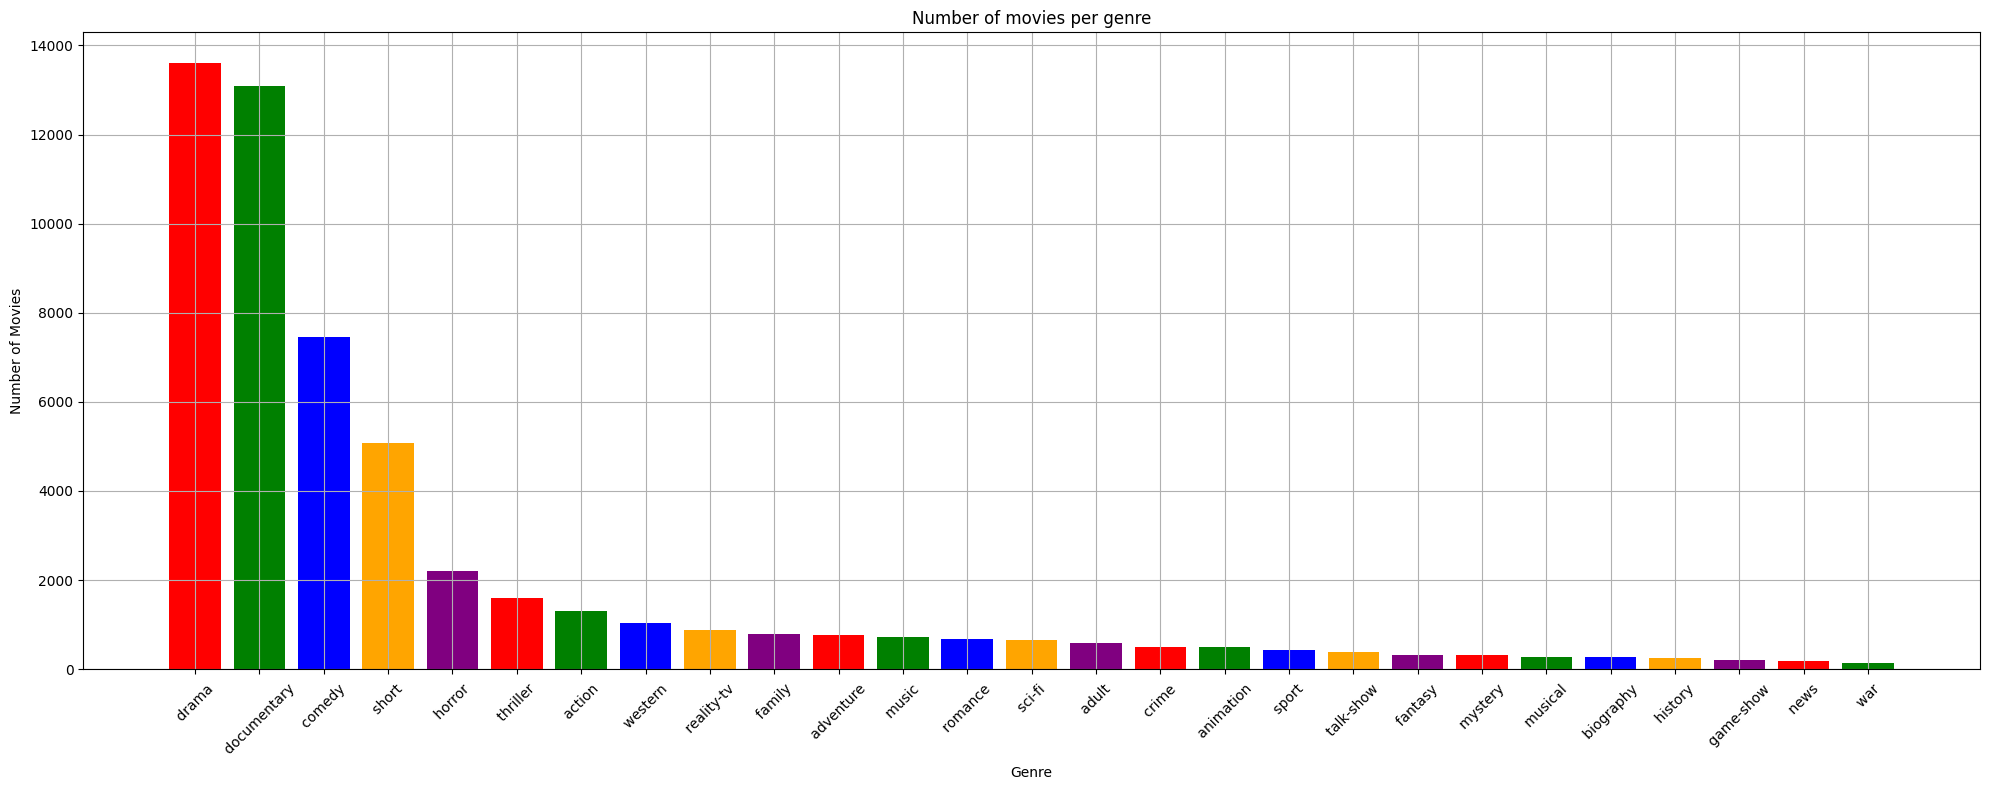

The most watched genre is:  drama 


In [16]:
import matplotlib.pyplot as plt 
genre_counts = df_train['GENRE'].value_counts()
plt.figure(figsize=(20,8))
plt.bar(genre_counts.index, genre_counts.values, color=['red', 'green', 'blue', 'orange', 'purple'])
plt.title('Number of movies per genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

most_watched_genre = genre_counts.idxmax()
print("The most watched genre is:", most_watched_genre)

In [17]:
df_train = df_train.drop(columns=['ID'], axis=1)
x_test = x_test.drop(columns=['ID'], axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['GENRE'] = le.fit_transform(df_train['GENRE'])
df_test_sol['GENRE'] = le.fit_transform(df_test_sol['GENRE'])


In [19]:
df_train['combined_text'] = df_train['TITLE'] + ' ' + df_train['DESCRIPTION']
x_test['combined_text'] = x_test['TITLE'] + ' ' + x_test['DESCRIPTION']
y_train=df_train['GENRE']
y_test=df_test_sol['GENRE']

In [20]:
X_train=df_train.drop(['GENRE','DESCRIPTION','TITLE'],axis=1)

X_test=x_test.drop(['DESCRIPTION','TITLE'],axis=1)
y_train=df_train['GENRE']
y_test=df_test_sol['GENRE']

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_vectorizer.fit(X_train['combined_text'])

X_train = tfidf_vectorizer.transform(X_train['combined_text'])
X_test = tfidf_vectorizer.transform(X_test['combined_text'])

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1)

In [23]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=1)
log_model.fit(x_train, y_train)

c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [26]:
y_train_pred1=log_model.predict(x_train)
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57      1193
           1       0.90      0.41      0.57       524
           2       0.86      0.26      0.39       713
           3       0.93      0.12      0.21       456
           4       0.00      0.00      0.00       242
           5       0.72      0.80      0.76      6683
           6       0.78      0.06      0.12       458
           7       0.74      0.94      0.83     11786
           8       0.65      0.91      0.76     12248
           9       0.78      0.17      0.28       707
          10       1.00      0.02      0.04       282
          11       0.95      0.58      0.72       180
          12       0.00      0.00      0.00       218
          13       0.82      0.75      0.78      1995
          14       0.87      0.51      0.64       657
          15       0.89      0.03      0.06       250
          16       1.00      0.01      0.02       291
          17       0.92    

c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [25]:
y_val_pred1=log_model.predict(x_val)
print(classification_report(y_val,y_val_pred1))

              precision    recall  f1-score   support

           0       0.31      0.14      0.19       122
           1       0.60      0.14      0.22        66
           2       0.61      0.18      0.28        62
           3       0.67      0.05      0.09        42
           4       0.00      0.00      0.00        23
           5       0.56      0.62      0.59       764
           6       0.00      0.00      0.00        47
           7       0.64      0.87      0.74      1310
           8       0.55      0.80      0.65      1365
           9       0.67      0.08      0.14        77
          10       0.00      0.00      0.00        41
          11       0.89      0.57      0.70        14
          12       0.00      0.00      0.00        25
          13       0.74      0.63      0.68       209
          14       0.67      0.38      0.48        74
          15       0.00      0.00      0.00        27
          16       0.00      0.00      0.00        28
          17       0.00    

c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [27]:
y_test_pred1=log_model.predict(X_test)
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.52      0.27      0.35      1314
           1       0.60      0.20      0.30       590
           2       0.70      0.17      0.27       775
           3       0.64      0.01      0.03       498
           4       0.00      0.00      0.00       264
           5       0.55      0.57      0.56      7446
           6       0.48      0.02      0.04       505
           7       0.65      0.88      0.75     13096
           8       0.53      0.80      0.64     13612
           9       0.54      0.08      0.14       783
          10       0.00      0.00      0.00       322
          11       0.87      0.52      0.65       193
          12       0.00      0.00      0.00       243
          13       0.67      0.56      0.61      2204
          14       0.71      0.39      0.50       731
          15       0.50      0.00      0.01       276
          16       1.00      0.00      0.01       318
          17       0.80    

c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [28]:
from sklearn.svm import LinearSVC

svc_model=LinearSVC(penalty='l2',C=0.1,dual=False)
svc_model.fit(x_train,y_train)

LinearSVC(C=0.1, dual=False)

In [29]:
y_train_pred2=svc_model.predict(x_train)
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

           0       0.90      0.54      0.68      1193
           1       0.95      0.59      0.73       524
           2       0.94      0.38      0.54       713
           3       0.98      0.37      0.54       456
           4       1.00      0.00      0.01       242
           5       0.76      0.77      0.77      6683
           6       1.00      0.15      0.26       458
           7       0.74      0.95      0.83     11786
           8       0.66      0.91      0.77     12248
           9       0.93      0.25      0.40       707
          10       0.95      0.21      0.34       282
          11       0.94      0.80      0.86       180
          12       1.00      0.01      0.02       218
          13       0.81      0.83      0.82      1995
          14       0.91      0.65      0.76       657
          15       1.00      0.14      0.24       250
          16       1.00      0.15      0.26       291
          17       0.97    

In [30]:
y_val_pred2=svc_model.predict(x_val)
print(classification_report(y_val,y_val_pred2))

              precision    recall  f1-score   support

           0       0.36      0.16      0.23       122
           1       0.67      0.18      0.29        66
           2       0.67      0.23      0.34        62
           3       0.67      0.05      0.09        42
           4       0.00      0.00      0.00        23
           5       0.55      0.57      0.56       764
           6       0.00      0.00      0.00        47
           7       0.62      0.90      0.74      1310
           8       0.55      0.80      0.65      1365
           9       0.75      0.04      0.07        77
          10       0.00      0.00      0.00        41
          11       0.82      0.64      0.72        14
          12       0.00      0.00      0.00        25
          13       0.69      0.68      0.69       209
          14       0.69      0.42      0.52        74
          15       0.00      0.00      0.00        27
          16       0.00      0.00      0.00        28
          17       0.00    

c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [31]:
y_test_pred2=svc_model.predict(X_test)
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.55      0.25      0.34      1314
           1       0.67      0.25      0.36       590
           2       0.72      0.17      0.28       775
           3       0.68      0.03      0.07       498
           4       0.00      0.00      0.00       264
           5       0.56      0.55      0.56      7446
           6       0.50      0.01      0.02       505
           7       0.64      0.89      0.74     13096
           8       0.54      0.80      0.64     13612
           9       0.64      0.07      0.12       783
          10       0.71      0.02      0.03       322
          11       0.80      0.59      0.67       193
          12       0.00      0.00      0.00       243
          13       0.63      0.62      0.62      2204
          14       0.70      0.40      0.51       731
          15       0.67      0.01      0.01       276
          16       0.33      0.00      0.01       318
          17       0.86    

c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def predict_genre(title, description, model, vectorizer, label_encoder):

    data = pd.DataFrame({'TITLE': [title], 'DESCRIPTION': [description]})

    data['combined_text'] = data['TITLE'] + ' ' + data['DESCRIPTION'] 

    X_new = vectorizer.transform(data['combined_text'])

    y_pred = model.predict(X_new)

    predicted_genre = label_encoder.inverse_transform(y_pred)[0]

    return predicted_genre

In [34]:
predict_genre("Peaky Blinders", "A gangster family epic set in 1900s England, centering on a gang who sew razor blades in the peaks of their caps, and their fierce boss Tommy Shelby.", svc_model, tfidf_vectorizer, le )

' drama '